In [1]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import seaborn as sns
import graphviz
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic_df= pd.read_csv("https://www.dropbox.com/s/4tw0ttokdrl62qs/titanic_train.csv?dl=1")

In [3]:
titanic_df.describe()
print(titanic_df.columns)
print(titanic_df.info())

Index(['passengerId', 'survived', 'pclass', 'name', 'sex', 'age', 'sibSp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerId  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibSp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
# Convert categorical variables to numerical variables
titanic_df['sex'] = titanic_df['sex'].replace({'male': 0, 'female': 1})
titanic_df['embarked'] = titanic_df['embarked'].replace({'S': 0, 'C': 1, 'Q': 2})
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerId  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    int64  
 5   age          714 non-null    float64
 6   sibSp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB
None


In [5]:
# Remove unnecessary columns
titanic_df = titanic_df.drop(['passengerId','name','ticket','cabin'], axis=1)

In [6]:
# Replace missing values with the mean of the column
titanic_df.fillna(titanic_df.mean(), inplace=True)

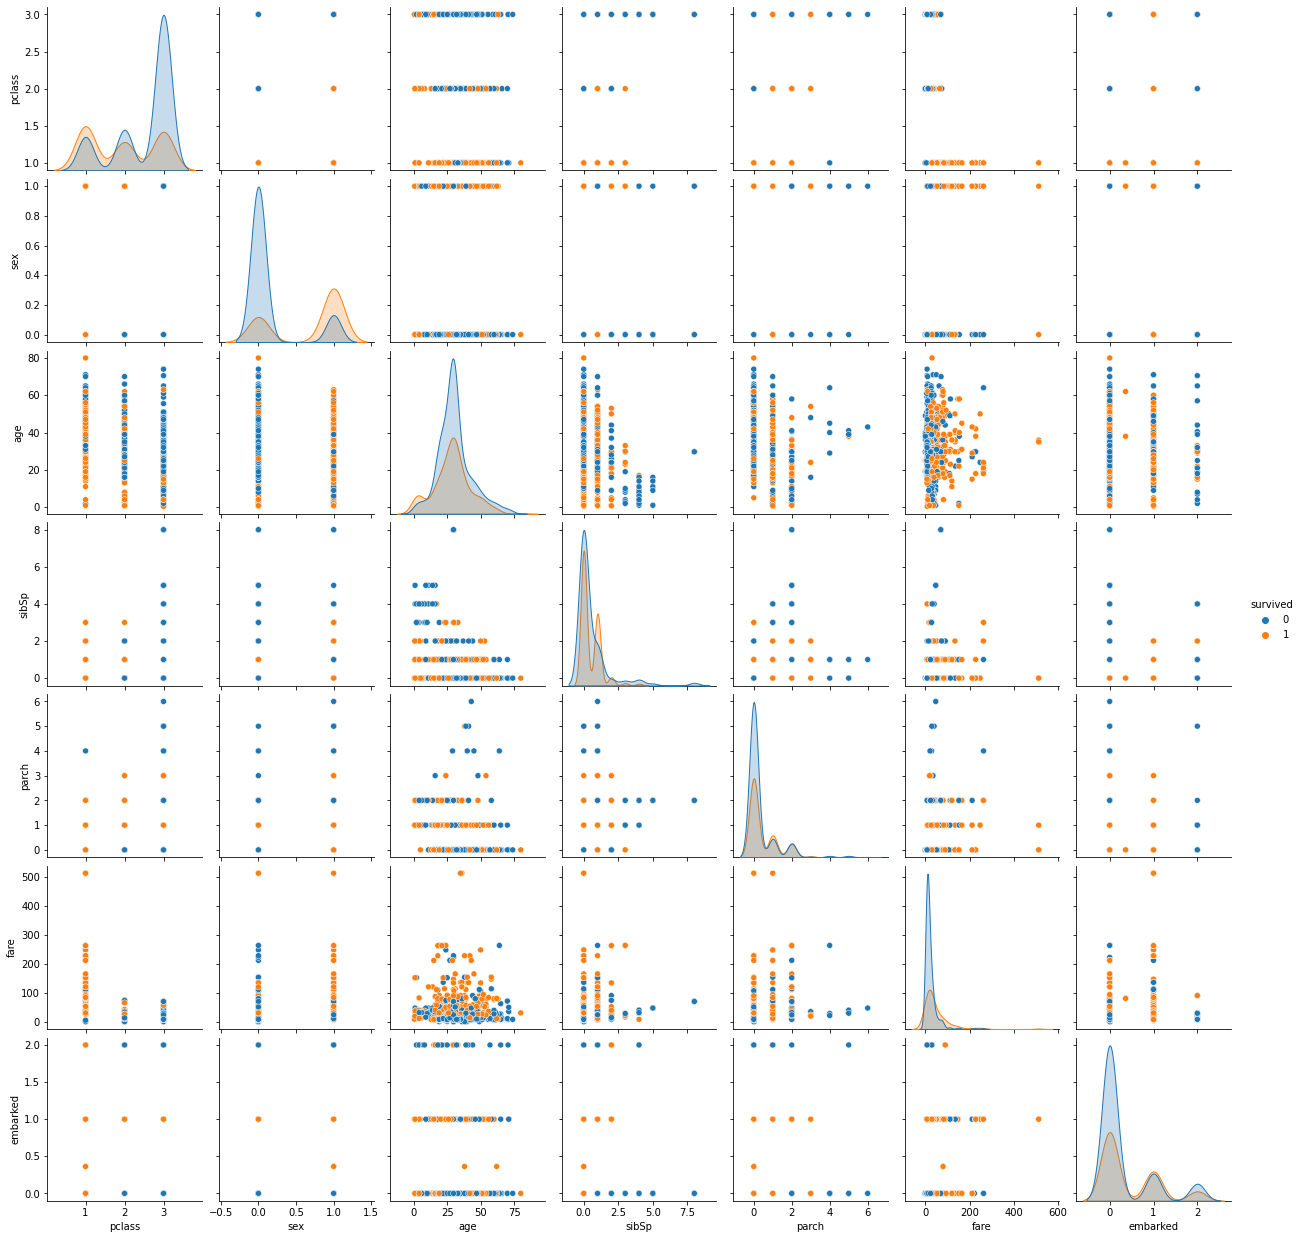

In [7]:
g=sns.pairplot(titanic_df,hue="survived")

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(titanic_df.drop('survived', axis=1), 
                                                    titanic_df['survived'], 
                                                    test_size=0.2, 
                                                    random_state=42)


In [9]:
# Create a decision tree classifier using the CART algorithm with max depth of 5
dt = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)


In [10]:
# Fit the model to the training data
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [11]:
# Predict the labels for the testing data
y_pred = dt.predict(X_test)


In [12]:
# Calculate the prediction performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F-1 Score:', f1)

Accuracy: 0.7988826815642458
Precision: 0.796875
Recall: 0.6891891891891891
F-1 Score: 0.7391304347826088


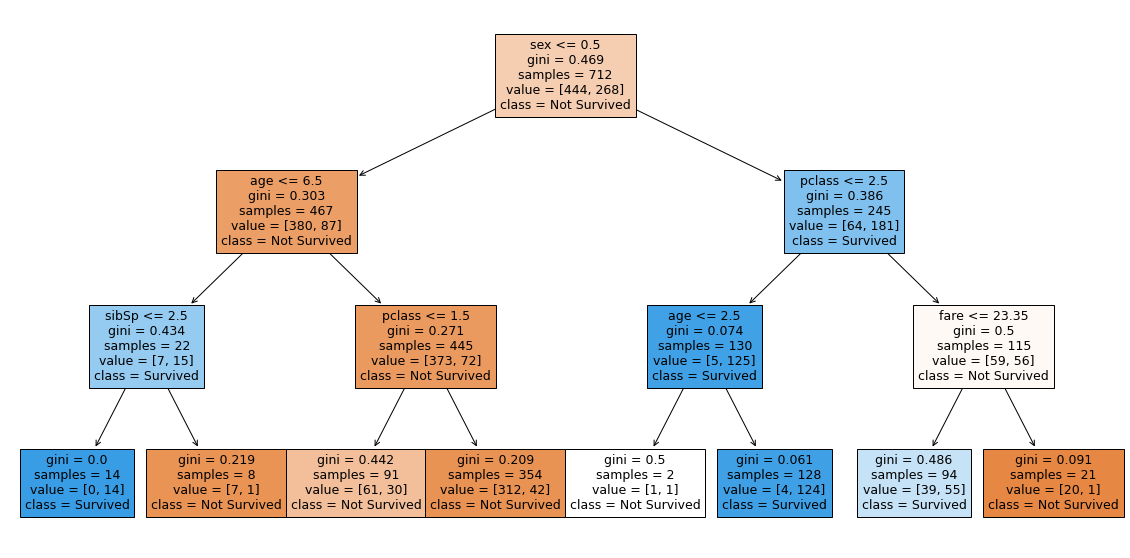

In [13]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X_train.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

In [14]:
# Export the decision tree to a DOT file
dot_data = export_graphviz(dt, out_file=None)
# Visualize the decision tree
graph = graphviz.Source(dot_data)
graph.render("titanic_tree")  # Save the tree to a file
graph.view()  # Open the tree in the default viewer

'titanic_tree.pdf'

#### Let's loop over different max_depth parameters and see how it affects performance measures

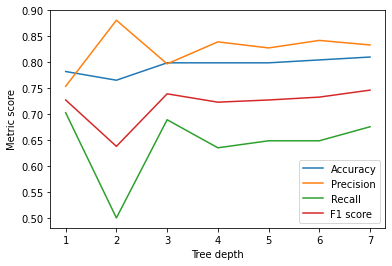

In [16]:
# Define lists to store the results
depths = list(range(1, 8))
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Loop over different tree depths
for depth in depths:
    # Create a decision tree classifier using the CART algorithm with current max depth
    dt = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)

    # Fit the model to the training data
    dt.fit(X_train, y_train)

    # Predict the labels for the testing data
    y_pred = dt.predict(X_test)

    # Calculate the metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append the results to the lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Plot the results
plt.plot(depths, accuracy_scores, label='Accuracy')
plt.plot(depths, precision_scores, label='Precision')
plt.plot(depths, recall_scores, label='Recall')
plt.plot(depths, f1_scores, label='F1 score')
plt.xlabel('Tree depth')
plt.ylabel('Metric score')
plt.legend()
plt.show()